# Geometry optimization 2

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.collections as mcollections

import geometry_optimization

In [9]:
# Default geometric parameters
maxX = 5e-3
maxY = 5e-3

metalThickness = 100e-9
fingerLength = 10e-6
fingerWidth = 30e-6
contactResistivityCNTs = 45.4e-6
resistivityElectrolyte = 1
fingerWidth = math.sqrt((fingerLength*contactResistivityCNTs)/resistivityElectrolyte)

gap = 4e-6#fingerWidth

lineWidth = 5e-6
lineLength = maxY-2*lineWidth-gap
resistivityCNTs = 1.75e-5
cNTsThickness = 100e-6


In [3]:
math.sqrt((fingerLength*contactResistivityCNTs)/resistivityElectrolyte)

2.1307275752662516e-05

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


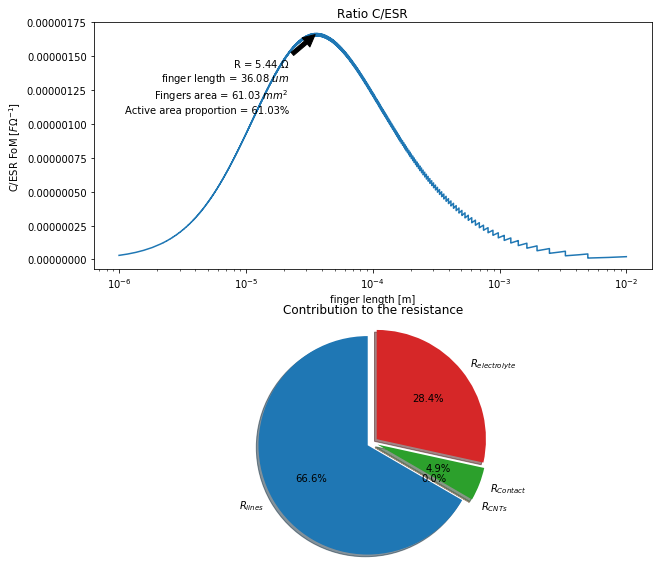

In [28]:
# Default geometric parameters
maxX = 10e-3
maxY = 10e-3

metalThickness = 100e-9
fingerLength = 200e-6
fingerWidth = 64e-6
fingerWidth = math.sqrt((fingerLength*contactResistivityCNTs)/resistivityElectrolyte)

gap = 4e-6#fingerWidth

lineWidth = 16e-6
lineLength = maxY-2*lineWidth-gap
resistivityCNTs = 1.75e-5
cNTsThickness = 100e-6
contactResistivityCNTs = 45.4e-6
resistivityElectrolyte = 1/1.15

fig, axes = plt.subplots(2,1,figsize=(10,10))  # an empty figure with no axes

ax = axes[0]

#ax = plt.subplot()  # a figure with a 2x2 grid of Axes

#fingerLengthList = np.linspace(1.0e-12, 10.0e-6, 300)
fingerLengthList = np.logspace(-6, -2, 20000)
ratioCR =  []
for x in fingerLengthList:
    #fingerWidth = math.sqrt((x*contactResistivityCNTs)/resistivityElectrolyte)
    #print(fingerWidth)
    if fingerWidth > maxY-2*lineWidth-gap:
        fingerWidth = maxY-2*lineWidth-gap
    elif fingerWidth < 2e-6:
        fingerWidth = 2e-6
    #print(C,R)
    C,Rlines,RfingersCNTs,RfingersContact,Relectrolyte,A,Ametal = geometry_optimization.compute_C_and_R(x,\
              fingerWidth=fingerWidth,\
             lineWidth=lineWidth,\
             lineLength=lineLength,\
             gap=gap,\
             maxX=maxX,\
             maxY=maxY,\
             metalThickness=metalThickness,\
			cNTsThickness = cNTsThickness,\
            resistivityElectrolyte = resistivityElectrolyte)
    ratioCR.append(C/(Rlines+RfingersCNTs+RfingersContact+Relectrolyte))
    
import operator
index, value = max(enumerate(ratioCR), key=operator.itemgetter(1))

ax.set_title("Ratio C/ESR")
ax.set_xlabel("finger length [m]")
ax.set_ylabel("C/ESR FoM [$F \Omega^{-1}$]")

bestFingerLength = fingerLengthList[index]
#print(bestFingerLength)
C,Rlines,RfingersCNTs,RfingersContact,Relectrolyte,A,Ametal = geometry_optimization.compute_C_and_R(bestFingerLength,\
              fingerWidth=fingerWidth,\
             lineWidth=lineWidth,\
             lineLength=lineLength,\
             gap=gap,\
             maxX=maxX,\
             maxY=maxY,\
             metalThickness=metalThickness,\
			cNTsThickness = cNTsThickness,\
            resistivityElectrolyte = resistivityElectrolyte)
R = Rlines+RfingersCNTs+RfingersContact+Relectrolyte
ax.annotate('R = ' + str(round(R,2)) + " $\Omega$"+\
            "\nfinger length = "+str(round(bestFingerLength*1e6,2))+" $um$\n"+\
            "Fingers area = " + str(round(A*1e6,2)) +" $mm^2$\n"+\
            "Active area proportion = " + str(round(100*A/(maxX*maxY),2)) + "%",
            xy=(bestFingerLength, value), xycoords='data',
            xytext=(0.35, 0.86), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

#print(str(round(100*Ametal/(maxX*maxY),2)))

#ax.plot(fingerLengthList, ratioCR)
ax.semilogx(fingerLengthList, ratioCR)

axes[1].set_title("Contribution to the resistance")

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '$R_{lines}$', '$R_{CNTs}$', '$R_{Contact}$', '$R_{electrolyte}$'
sizes = [Rlines,RfingersCNTs,RfingersContact,Relectrolyte]
explode = (0.05, 0.05, 0.05, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

axes[1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig.savefig("ratio_over_finger_length_2.eps")
plt.show()

[4.0e-06 8.0e-06 1.6e-05]
3.9999999999999996e-05 4e-06
7.999999999999999e-05 4e-06
0.00015999999999999999 4e-06
0.00031999999999999997 4e-06
0.0006399999999999999 4e-06
0.0012799999999999999 4e-06
3.9999999999999996e-05 8e-06
7.999999999999999e-05 8e-06
0.00015999999999999999 8e-06
0.00031999999999999997 8e-06
0.0006399999999999999 8e-06
0.0012799999999999999 8e-06
3.9999999999999996e-05 1.6e-05
7.999999999999999e-05 1.6e-05
0.00015999999999999999 1.6e-05
0.00031999999999999997 1.6e-05
0.0006399999999999999 1.6e-05
0.0012799999999999999 1.6e-05


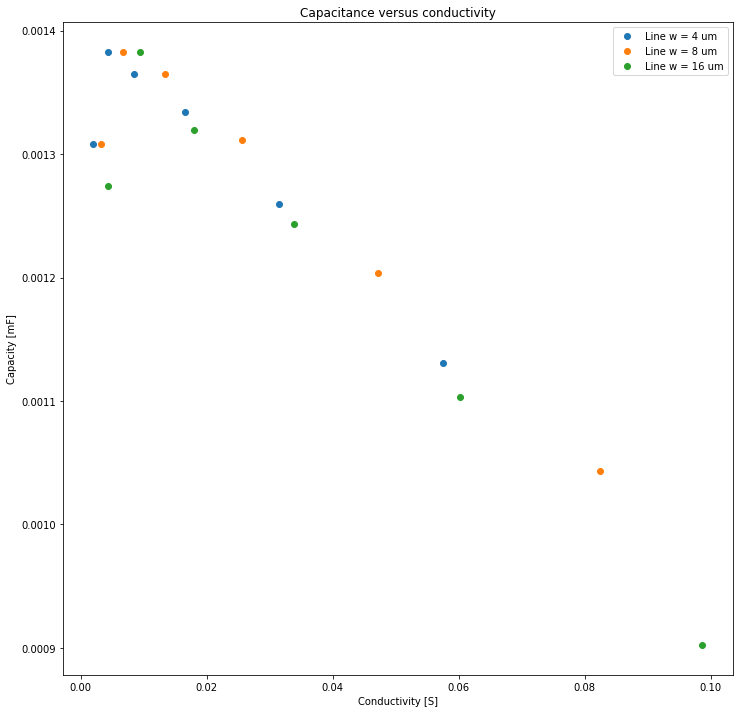

In [5]:
fig, ax = plt.subplots(figsize=(12,12))  # an empty figure with no axes

#ax = plt.subplot()  # a figure with a 2x2 grid of Axes

#fingerLengthList = np.linspace(1.0e-12, 10.0e-6, 300)
a = 4
b = 6
#fingerLengthList = np.logspace(-6, -2, a)
#lineWidthList = np.logspace(-6,-3,b)

fingerLengthList = np.array([40,80,160,320,640,1280])*1e-6
lineWidthList = np.array([4,8,16])*1e-6
print(lineWidthList)
ratioCR =  []
Cs = np.empty(len(fingerLengthList))
rhos = np.empty(len(fingerLengthList))
i = 0
for wl in lineWidthList:
    i=0
    for x in fingerLengthList:
        lineLength = maxY-2*wl-gap
        fingerWidth = math.sqrt((x*contactResistivityCNTs)/resistivityElectrolyte)
        print(str(x)+" "+str(wl))
        if fingerWidth > maxY-2*lineWidth-gap:
            fingerWidth = maxY-2*lineWidth-gap
        elif fingerWidth < 2e-6:
            fingerWidth = 2e-6
        #print(C,R)
        C,Rlines,RfingersCNTs,RfingersContact,Relectrolyte,A,Ametal = geometry_optimization.compute_C_and_R(x,\
                  fingerWidth=fingerWidth,\
                 lineWidth=wl,\
                 lineLength=maxY-2*lineWidth-gap,\
                 gap=gap,\
                 maxX=maxX,\
                 maxY=maxY,\
                 metalThickness=metalThickness,\
                cNTsThickness = cNTsThickness,\
                resistivityElectrolyte = resistivityElectrolyte)
        Cs[i] = C
        rhos[i] = 1/(Rlines+RfingersCNTs+RfingersContact+Relectrolyte)
        i = i+1
    ax.plot(rhos, 1000*Cs,"o",label="Line w = "+str(math.ceil(wl*1e6))+" um")
    ax.legend()
        

ax.set_title("Capacitance versus conductivity")
ax.set_xlabel("Conductivity [S]")
ax.set_ylabel("Capacity [mF]")



#x1 = 0.001
#y1 = 0.00013
#r1 = 0.003
#r2 = 0.00003
#patches = []
#ellipse = mpatches.Ellipse((x1, y1), r1, r2)
#patches.append(ellipse)
#p = mcollections.PatchCollection(patches, alpha=0.4)
#ax.add_collection(p)

fig.savefig("capacity_vs_conductivity_tradeoff.svg")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


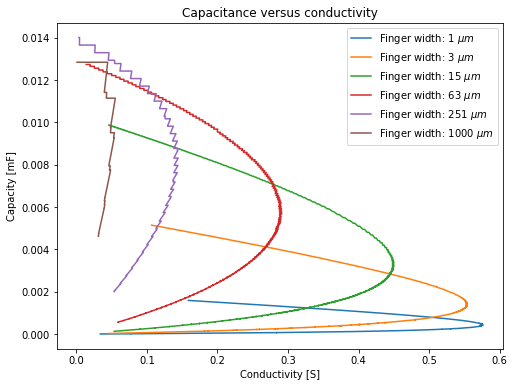

In [32]:
fig, ax = plt.subplots(figsize=(8,6))  # an empty figure with no axes

#ax = plt.subplot()  # a figure with a 2x2 grid of Axes

#fingerLengthList = np.linspace(1.0e-12, 10.0e-6, 300)
a = 6
b = 1000
fingerLengthList = np.logspace(-6, -3, a)
lineWidthList = np.logspace(-6,-3,b)
ratioCR =  []
Cs = np.empty(b)
rhos = np.empty(b)
i = 0
for x in fingerLengthList:
    i=0
    for wl in lineWidthList:
        lineLength = maxY-2*wl-gap
        fingerWidth = math.sqrt((x*contactResistivityCNTs)/resistivityElectrolyte)
        #print(fingerWidth)
        if fingerWidth > maxY-2*lineWidth-gap:
            fingerWidth = maxY-2*lineWidth-gap
        elif fingerWidth < 2e-6:
            fingerWidth = 2e-6
        #print(C,R)
        C,Rlines,RfingersCNTs,RfingersContact,Relectrolyte,A,Ametal = geometry_optimization.compute_C_and_R(x,\
                  fingerWidth=fingerWidth,\
                 lineWidth=wl,\
                 lineLength=maxY-2*lineWidth-gap,\
                 gap=gap,\
                 maxX=maxX,\
                 maxY=maxY,\
                 metalThickness=metalThickness,\
                cNTsThickness = cNTsThickness,\
                resistivityElectrolyte = resistivityElectrolyte)
        Cs[i] = C
        rhos[i] = 1/(Rlines+RfingersCNTs+RfingersContact+Relectrolyte)
        i = i+1
    ax.plot(rhos, 1000*Cs,label="Finger length: "+str(math.floor(x*1e6))+" $\mu m$")
        

ax.set_title("Capacitance versus conductivity")
ax.set_xlabel("Conductivity [S]")
ax.set_ylabel("Capacity [mF]")
ax.legend()

fig.savefig("capacity_vs_conductivity_tradeoff.eps")
plt.show()

5.728460224164202e-06
6.129702147982478e-06
6.592360553560274e-06
6.938124075102253e-06
7.407019400753741e-06
8.106725024998687e-06
8.775000752042158e-06
9.661604430871994e-06
1.0593787386732438e-05
1.1599872685788112e-05
1.3202495641907636e-05
1.4670952903056007e-05
1.6582919138893578e-05
1.8969850278804235e-05
2.1610595445330207e-05
2.3881901536634958e-05
2.744554906909692e-05
3.143944521007573e-05
3.6532394089317605e-05
4.146492498650107e-05
4.809324754153679e-05
5.534611668385884e-05
6.520647368477329e-05
7.339953095689097e-05
8.861298673532615e-05
0.0001029202008408174
0.00012097736897557648
0.00013661763889606304
0.00016147690081697415
0.0001898951731203588
0.0002188351121181222
0.0002670061877518875
0.0003134186287925439
0.000393124152455895
0.0004551273209353702
0.0005599347317884844
0.0005847070723774212
0.0006225005034211535
0.000990717415747365
0.00124553164982781


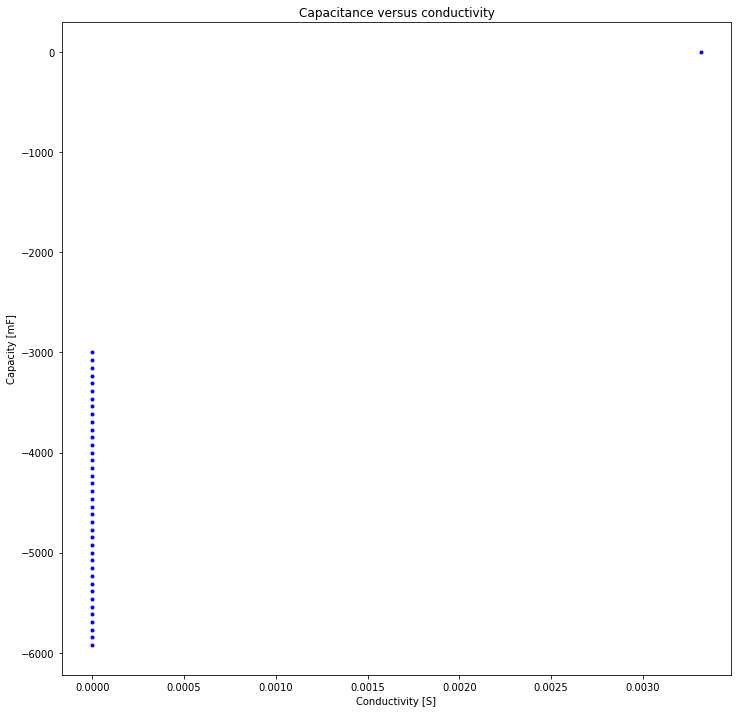

In [7]:
fig, ax = plt.subplots(figsize=(12,12))  # an empty figure with no axes

#ax = plt.subplot()  # a figure with a 2x2 grid of Axes

#fingerLengthList = np.linspace(1.0e-12, 10.0e-6, 300)
a = 6
b = 40
fingerLengthList = np.logspace(-6, -3, a)
lineWidthList = np.logspace(-6,-3,b)
ratioCR =  []
Cs = np.empty(b)
rhos = np.empty(b)
i = 0
for wl in lineWidthList:
    i=0
    x = geometry_optimization.get_best_finger_length(fingerLength,\
#             fingerWidth=fingerWidth,\
             lineWidth=wl,\
             lineLength=maxY-2*lineWidth-gap,\
             gap=gap,\
             maxX=maxX,\
             maxY=maxY,\
             metalThickness=metalThickness,\
             cNTsThickness = cNTsThickness,\
             resistivityElectrolyte = resistivityElectrolyte)
    fingerWidth = math.sqrt((x*contactResistivityCNTs)/resistivityElectrolyte)
    if fingerWidth > maxY-2*lineWidth-gap:
        fingerWidth = maxY-2*lineWidth-gap
    elif fingerWidth < 2e-6:
        fingerWidth = 2e-6
    print(x)
    #print(C,R)
    C,Rlines,RfingersCNTs,RfingersContact,Relectrolyte,A,Ametal = geometry_optimization.compute_C_and_R(x,\
             fingerWidth=fingerWidth,\
             lineWidth=wl,\
             lineLength=maxY-2*lineWidth-gap,\
             gap=gap,\
             maxX=maxX,\
             maxY=maxY,\
             metalThickness=metalThickness,\
             cNTsThickness = cNTsThickness,\
             resistivityElectrolyte = resistivityElectrolyte)
    Cs[i] = C
    rhos[i] = 1/(Rlines+RfingersCNTs+RfingersContact+Relectrolyte)
    i = i+1

ax.plot(rhos, 1000*Cs,"b.",label=str(wl))
        

ax.set_title("Capacitance versus conductivity")
ax.set_xlabel("Conductivity [S]")
ax.set_ylabel("Capacity [mF]")

fig.savefig("capacity_vs_conductivity_tradeoff.eps")
plt.show()

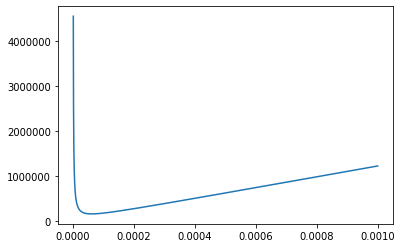

In [8]:
R = lambda x: (contactResistivityCNTs/(x*cNTsThickness))+(resistivityElectrolyte*(gap+x)/(cNTsThickness*fingerLength))
x = np.logspace(-6, -3, 20000)
y = R(x)
plt.plot(x,y)